In [2]:
import scipy.io as sio
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [3]:
data = sio.loadmat('data/dset.mat')

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'list_family', 'list_genus', 'list_species', 'X', 'Y_family', 'Y_genus', 'Y_species'])

In [35]:
Y_species = data.get('Y_species')

In [36]:
Y_species

array([[ 2],
       [ 7],
       [ 2],
       ...,
       [ 1],
       [10],
       [ 5]], dtype=int32)

In [37]:
Y_species[0]

array([2], dtype=int32)

In [38]:
Y_genus = data.get('Y_genus')

In [40]:
Y_genus

array([[1],
       [5],
       [1],
       ...,
       [1],
       [8],
       [4]], dtype=int32)

In [8]:
X_vec = data.get('X')

In [9]:
X_vec

array([[-1.        , -0.85208478, -0.5446153 , ...,  0.03081446,
        -0.04646877, -0.10260198],
       [-1.        , -0.83122403, -0.35381633, ..., -0.05976682,
        -0.04458574,  0.01394643],
       [-1.        , -0.87307382, -0.50275353, ...,  0.08532905,
        -0.01570336, -0.07587386],
       ...,
       [-1.        , -0.52845271, -0.09051293, ...,  0.00273226,
        -0.0143477 , -0.00636827],
       [-1.        , -0.8586075 , -0.27509567, ..., -0.00910596,
        -0.00653614, -0.01747479],
       [-1.        , -0.44213437,  0.002258  , ..., -0.0188348 ,
         0.01213924,  0.01604267]])

In [7]:
X_vec[0]

array([-1.        , -0.85208478, -0.5446153 , -0.23023933, -0.15827164,
       -0.10030244, -0.11154368, -0.04217562,  0.05429012, -0.01039922,
       -0.10284336, -0.02367292,  0.00542988, -0.13799486, -0.15663055,
       -0.03263575,  0.02750404,  0.01395437, -0.01718162, -0.04397875,
       -0.0025327 ,  0.03081446, -0.04646877, -0.10260198])

In [8]:
lst_species = data.get('list_species')

In [9]:
lst_species

array([[array(['AdenomeraAndre'], dtype='<U14')],
       [array(['AdenomeraHylaedactylus'], dtype='<U22')],
       [array(['Ameeregatrivittata'], dtype='<U18')],
       [array(['HylaMinuta'], dtype='<U10')],
       [array(['HypsiboasCinerascens'], dtype='<U20')],
       [array(['HypsiboasCordobae'], dtype='<U17')],
       [array(['LeptodactylusFuscus'], dtype='<U19')],
       [array(['OsteocephalusOophagus'], dtype='<U21')],
       [array(['Rhinellagranulosa'], dtype='<U17')],
       [array(['ScinaxRuber'], dtype='<U11')]], dtype=object)

In [10]:
lst_species.size

10

In [11]:
x = np.random.random((10, 5))
y = np.random.random((10, 5))

n = x.shape[1]
cov_bias = np.mean(x * y, axis=1) - np.mean(x, axis=1) * np.mean(y, axis=1)
cov_bias * n / (n-1)

array([ 0.01773218,  0.0082373 ,  0.09795756,  0.03193004,  0.00321138,
       -0.01455587, -0.07308648, -0.05278416, -0.05328468,  0.06120123])

In [13]:
s = np.empty((X_vec.shape[0], 1))
for i in range(X_vec.shape[]):
    print(np.cov(X_vec[i]))

TypeError: 'tuple' object cannot be interpreted as an integer

In [10]:
res1_1 = np.cov(X_vec.T)

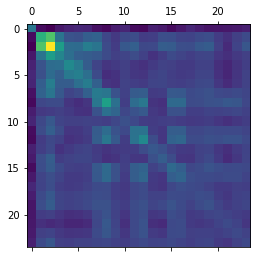

In [11]:
plt.matshow(res1_1)

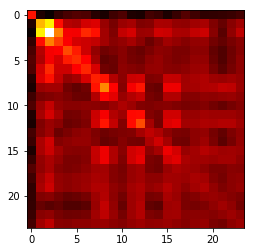

In [12]:
plt.imshow(res1_1,cmap='hot')

In [13]:
def my_mean(matrix):
    """
    Calculates mean values in a matrix
    Parameters:
      matrix: N-by-D data matrix
    Returns:
      mu: D-by-1 column vector of sample mean values, where mu(i) = mean(matrix(:,i)).
    """
    
    # Check if the matrix is not empty to make sure we do not divide by 0.
    if matrix.shape[0] == 0:
        s = 1
    else: 
        s = matrix.shape[0]
    
    # Compute sample mean vector
    mu = (np.sum(matrix, axis=0) / s).T 

    return mu

In [14]:
my_mean(X_vec)

array([-9.74023093e-01, -8.23533833e-01, -4.52956670e-01, -1.52934802e-01,
       -1.13522768e-01, -6.70683332e-02, -7.01563139e-02, -7.87939721e-02,
       -3.39201905e-02, -3.41943458e-02, -6.79849815e-02, -3.06505621e-02,
       -6.81939029e-04, -5.15607191e-02, -7.30336627e-02, -3.58473314e-02,
       -1.59155014e-02, -3.17948169e-02, -4.57046675e-02, -4.37078192e-02,
       -1.10627371e-02,  7.34052998e-03, -2.26644598e-02, -5.04837882e-02])

In [15]:
np.mean(X_vec, axis=0)

array([-9.74023093e-01, -8.23533833e-01, -4.52956670e-01, -1.52934802e-01,
       -1.13522768e-01, -6.70683332e-02, -7.01563139e-02, -7.87939721e-02,
       -3.39201905e-02, -3.41943458e-02, -6.79849815e-02, -3.06505621e-02,
       -6.81939029e-04, -5.15607191e-02, -7.30336627e-02, -3.58473314e-02,
       -1.59155014e-02, -3.17948169e-02, -4.57046675e-02, -4.37078192e-02,
       -1.10627371e-02,  7.34052998e-03, -2.26644598e-02, -5.04837882e-02])

In [16]:
def my_cov(X):
    """
    Calculates covariance of a NxD matrix.
    Parameters:
      matrix: N-by-D data matrix
    Returns:
      cov: D-by-D covariance matrix.
    """
    X_mean = my_mean(X)
    X_shifted = X - X_mean
    # Using Maximum Likelihood Estimation so divide by N
    cov = np.matmul(X_shifted.T, X_shifted) / X.shape[0]
    return cov

In [17]:
my_cov(X_vec) - np.cov(X_vec.T)

array([[-2.77669412e-06,  1.02848364e-06,  1.38903481e-06,
         7.03346308e-07,  3.61843130e-07,  2.14442084e-07,
         2.97231537e-07,  9.08831823e-07,  1.13760600e-06,
         5.20022532e-07,  2.94411815e-07,  1.01835974e-06,
         1.13870462e-06,  4.60191770e-07,  6.30334265e-07,
         1.08002129e-06,  6.40817979e-07,  2.00088446e-07,
         5.23196436e-07,  7.74899896e-07,  7.29820753e-07,
         6.90019746e-07,  6.38683500e-07,  4.57870875e-07],
       [ 1.02848364e-06, -5.39628171e-06, -6.33371445e-06,
        -2.70745488e-06, -1.33887132e-06, -1.19548976e-06,
        -1.81098432e-06, -1.97454893e-06, -8.99026707e-07,
        -3.88267816e-07, -9.25014382e-07, -1.07054127e-06,
        -4.91229834e-07, -5.83273228e-07, -1.17676938e-06,
        -1.11360177e-06, -7.76119664e-07, -7.70019341e-07,
        -1.00986932e-06, -1.10887638e-06, -4.84564481e-07,
        -9.80968431e-08, -6.37917580e-07, -1.00922336e-06],
       [ 1.38903481e-06, -6.33371445e-06, -9.26306465e

In [18]:
res1_1_2 = np.corrcoef(X_vec.T)

In [19]:
def my_corr(X):
    c = my_cov(X)
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
    print(stddev)
    print(stddev[None, :])
    c /= stddev[:, None]
    c /= stddev[None, :]

    # Clip real and imaginary parts to [-1, 1].  This does not guarantee
    # abs(a[i,j]) <= 1 for complex arrays, but is the best we can do without
    # excessive work.
    np.clip(c.real, -1, 1, out=c.real)
    if np.iscomplexobj(c):
        np.clip(c.imag, -1, 1, out=c.imag)

    return c

In [20]:
my_corr(X_vec) - res1_1_2

[0.10869606 0.15152946 0.19853045 0.12097385 0.12469067 0.11657094
 0.11424995 0.11261082 0.14081281 0.09383898 0.07124204 0.10546323
 0.12495465 0.07990305 0.08680792 0.09808073 0.09291583 0.06601126
 0.06897042 0.07336082 0.06069192 0.06588229 0.064544   0.06201563]
[[0.10869606 0.15152946 0.19853045 0.12097385 0.12469067 0.11657094
  0.11424995 0.11261082 0.14081281 0.09383898 0.07124204 0.10546323
  0.12495465 0.07990305 0.08680792 0.09808073 0.09291583 0.06601126
  0.06897042 0.07336082 0.06069192 0.06588229 0.064544   0.06201563]]


array([[-1.11022302e-16,  5.55111512e-17,  5.55111512e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.38777878e-17,  5.55111512e-17,  5.55111512e-17,
         5.55111512e-17,  8.32667268e-17,  0.00000000e+00,
         5.55111512e-17,  8.32667268e-17,  5.55111512e-17,
         5.55111512e-17,  5.55111512e-17,  2.77555756e-17,
         0.00000000e+00,  5.55111512e-17,  1.11022302e-16,
         0.00000000e+00, -5.55111512e-17,  1.11022302e-16],
       [ 0.00000000e+00,  2.22044605e-16,  1.11022302e-16,
         1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.55111512e-17,  0.00000000e+00,
         1.38777878e-17, -1.11022302e-16,  0.00000000e+00,
         0.00000000e+00,  2.77555756e-17,  5.55111512e-17,
         5.55111512e-17,  0.00000000e+00, -5.55111512e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.11022302e-16,  0.00000000e

In [21]:
my_corr(X_vec)

[0.10869606 0.15152946 0.19853045 0.12097385 0.12469067 0.11657094
 0.11424995 0.11261082 0.14081281 0.09383898 0.07124204 0.10546323
 0.12495465 0.07990305 0.08680792 0.09808073 0.09291583 0.06601126
 0.06897042 0.07336082 0.06069192 0.06588229 0.064544   0.06201563]
[[0.10869606 0.15152946 0.19853045 0.12097385 0.12469067 0.11657094
  0.11424995 0.11261082 0.14081281 0.09383898 0.07124204 0.10546323
  0.12495465 0.07990305 0.08680792 0.09808073 0.09291583 0.06601126
  0.06897042 0.07336082 0.06069192 0.06588229 0.064544   0.06201563]]


array([[ 1.        , -0.26569664, -0.27388722, -0.2275954 , -0.11359838,
        -0.0720121 , -0.10184146, -0.31592877, -0.3162536 , -0.21693252,
        -0.16177248, -0.37799487, -0.35673394, -0.22545572, -0.28424795,
        -0.43105668, -0.26997946, -0.11865601, -0.29695295, -0.4134921 ,
        -0.47072915, -0.40999501, -0.38736071, -0.2890198 ],
       [-0.26569664,  1.        ,  0.89584696,  0.62845215,  0.30151392,
         0.28797715,  0.44510365,  0.4923685 ,  0.17928044,  0.11618515,
         0.36459827,  0.28503934,  0.11039129,  0.20497985,  0.38065759,
         0.3188223 ,  0.23455324,  0.3275564 ,  0.41115422,  0.42444504,
         0.22419358,  0.04181083,  0.27753078,  0.45697093],
       [-0.27388722,  0.89584696,  1.        ,  0.80485574,  0.41013691,
         0.43051758,  0.58452342,  0.5265494 ,  0.15671599,  0.11519413,
         0.46906751,  0.37005141,  0.15963272,  0.26074599,  0.4315103 ,
         0.36196256,  0.26791028,  0.3665189 ,  0.48251816,  0.50496174,
  

In [22]:
l = np.array([1,2,3])

In [23]:
l[None, :]

array([[1, 2, 3]])

In [24]:
def my_corr_1(X):
    c = my_cov(X)
    
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    std_dev = np.sqrt(d.real)
    c /= (std_dev[:, None] * std_dev[None, :])
    
    return c

In [29]:
my_corr_1(X_vec) - np.corrcoef(X_vec.T)

array([[-1.11022302e-16,  5.55111512e-17,  5.55111512e-17,
         0.00000000e+00,  1.38777878e-17,  0.00000000e+00,
         1.38777878e-17,  5.55111512e-17,  5.55111512e-17,
         5.55111512e-17,  5.55111512e-17,  0.00000000e+00,
         5.55111512e-17,  5.55111512e-17,  5.55111512e-17,
         0.00000000e+00,  0.00000000e+00,  2.77555756e-17,
         5.55111512e-17,  5.55111512e-17,  1.11022302e-16,
        -5.55111512e-17, -5.55111512e-17,  1.11022302e-16],
       [ 0.00000000e+00,  1.11022302e-16,  1.11022302e-16,
         1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.77555756e-17,
         1.38777878e-17, -1.11022302e-16,  0.00000000e+00,
         0.00000000e+00,  2.77555756e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.93889390e-18,  5.55111512e-17,  0.00000000e+00],
       [ 5.55111512e-17,  1.11022302e-16,  1.11022302e